In [304]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
import math
import ast
import re
import seaborn as sns
import squarify 
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
from IPython.display import Image
%matplotlib inline
plt.rcParams
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 100

In [132]:
def generate_random_color(n):
    colors = []
    for i in range(n):
        tmp = [i* 0.001 for i in list(np.random.choice(range(1000), size=3))]
        colors.append(tmp)
    return colors

In [134]:
def rstr(df): 
    structural_info = pd.DataFrame(index=df.columns)
    structural_info['unique_len'] = df.apply(lambda x: len(x.unique())).values
    structural_info['unique_val'] = df.apply(lambda x: [x.unique()]).values
    print(df.shape)
    return structural_info  

# READ IN THE DATAFRAME

In [3]:
df = pd.read_csv('../data/raw/Data.csv')

In [4]:
df.head()

,POLICY_REF_DUMMY,PROPOSAL_SUBMISSION_DATE,FIRST_UW_DEC,LAST_UW_DEC,ISSUE_DATE,ST_DATE,POL_ST,QRY,PRODUCT_CATEGORY,PROD_TYPE,...,REGION_DUMMY,OWNER_AGE,OWNER_GENDER,OWNER_OCCUPATION,OWNER_OCCUPATION_CLASS,CLASS_ORDER,AGENCY,CHANNEL,SERV_BRANCH_DUMMY,AGENT_CD_DUMMY
0,POLID_6930,NaN,Issued Policy (UND),OK TO ISSUE,03/19/2013,04/23/2014,SURRENDERED,UL_BASIC,Investment,UL,...,REGION_11,34.0,F,PLANNER,NaN,0,NaN,NaN,SERV_BRANCH_398,NaN
1,POLID_3215,06/30/2011,Tagged as OK to issue,OK TO ISSUE,06/15/2011,06/08/2011,Inforce,TRAD_BASIC,Retirement,NUL,...,REGION_2,53.0,F,FAMILY MEDICINE - DOCTOR,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",4,NaN,NaN,SERV_BRANCH_452,AGENT_CD_58
2,POLID_7224,NaN,Issued Policy (UND),OK TO ISSUE,06/18/2013,06/17/2013,INFORCE,UL_BASIC,Investment,UL,...,REGION_1,59.0,F,HOUSEWIFE,NaN,0,NaN,NaN,SERV_BRANCH_564,AGENT_CD_42
3,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_BASIC,Retirement,NUL,...,REGION_10,50.0,F,BANK MANAGER,BANK,10,NaN,NaN,SERV_BRANCH_600,AGENT_CD_41
4,POLID_54,NaN,Tagged as OK to issue,OK TO ISSUE,12/14/2010,12/13/2010,Inforce,TRAD_RIDER,Protection,NUL,...,REGION_10,50.0,F,BANK MANAGER,BANK,10,NaN,NaN,SERV_BRANCH_600,AGENT_CD_41


In [5]:
df.iloc[0]

POLICY_REF_DUMMY                     POLID_6930
PROPOSAL_SUBMISSION_DATE                    NaN
FIRST_UW_DEC                Issued Policy (UND)
LAST_UW_DEC                         OK TO ISSUE
ISSUE_DATE                           03/19/2013
ST_DATE                              04/23/2014
POL_ST                              SURRENDERED
QRY                                    UL_BASIC
PRODUCT_CATEGORY                     Investment
PROD_TYPE                                    UL
PRODUCT_CODE                              2,161
PRODUCT_NAME_L1                   Optimal Power
PRODUCT_NAME                 OPTIMAL POWER PESO
BASIC_COVER_TYPE                      UNIT LINK
COVER_CODE                                2,161
COVER_TYPE                                Basic
COVER_CAT                                   NaN
INSURED_AMT                          125,000.00
PREMIUM                              100,000.00
COVER_TERM                                    1
PAY_TERM                                

* Explore Data Dictionary

In [6]:
df_info = pd.read_excel('../data/raw/Data_dictionary.xlsx')

In [7]:
df_info

,DIMENSION_&_METRIC,DESCRIPTION,NOTES
0,POLICY_REF_DUMMY,Reference number of the policy,NaN
1,PROPOSAL_SUBMISSION_DATE,Policy submission date,NaN
2,FIRST_UW_DEC,First underwritting decision,NaN
3,LAST_UW_DEC,Last underwritting decision,NaN
4,ISSUE_DATE,Date policy was issued,NaN
5,ST_DATE,Date of last updated policy status,NaN
6,POL_ST,Last updated policy status,NaN
7,QRY,"Transaction type (traditional basic, tradition...","""app"" refers to applications that were submitt..."
8,PRODUCT_CATEGORY,Product category,NaN
9,PROD_TYPE,Product type,NaN


In [39]:
len(df)

20752

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20752 entries, 0 to 20751
Data columns (total 49 columns):
POLICY_REF_DUMMY            20752 non-null object
PROPOSAL_SUBMISSION_DATE    15728 non-null object
FIRST_UW_DEC                20416 non-null object
LAST_UW_DEC                 20416 non-null object
ISSUE_DATE                  19967 non-null object
ST_DATE                     19967 non-null object
POL_ST                      20752 non-null object
QRY                         20752 non-null object
PRODUCT_CATEGORY            20752 non-null object
PROD_TYPE                   20752 non-null object
PRODUCT_CODE                20752 non-null object
PRODUCT_NAME_L1             12807 non-null object
PRODUCT_NAME                20752 non-null object
BASIC_COVER_TYPE            20752 non-null object
COVER_CODE                  20752 non-null object
COVER_TYPE                  20752 non-null object
COVER_CAT                   0 non-null float64
INSURED_AMT                 20309 non-null o

In [203]:
rstr(df).sort_values('unique_len')

(20752, 49)


,unique_len,unique_val
COVER_CAT,1,[[0.0]]
SMK_NO_CIG,1,[[0.0]]
AGENCY,1,[[0.0]]
CHANNEL,1,[[0.0]]
SMOKER_STATUS,1,[[0.0]]
PROD_TYPE,2,"[[UL, NUL]]"
GENDER,2,"[[F, M]]"
MEDICAL_FLAG,2,"[[0, Y]]"
COVER_TYPE,2,"[[Basic, Rider]]"
OWNER_GENDER,3,"[[F, M, 0]]"


In [38]:
df.isnull().sum().sort_values(ascending=False)

CHANNEL                     20752
AGENCY                      20752
SMOKER_STATUS               20752
SMK_NO_CIG                  20752
COVER_CAT                   20752
MEDICAL_FLAG                20328
BUYER_ID                    12617
PRODUCT_NAME_L1              7945
AGENT_CD_DUMMY               7609
PROPOSAL_SUBMISSION_DATE     5024
OCCUPATION                   1701
PREMIUM                      1112
OWNER_OCCUPATION_CLASS       1016
HEIGHT                       1014
COVER_TERM                    962
PAY_TERM                      962
PAY_AGE                       962
COVER_AGE                     962
OCCUPATION_CLASS              939
ISSUE_DATE                    785
ST_DATE                       785
WEIGHT                        569
INSURED_AMT                   443
FIRST_UW_DEC                  336
LAST_UW_DEC                   336
OWNER_OCCUPATION              316
REGION_DUMMY                  156
NATIONALITY_DUMMY              70
OWNER_GENDER                   27
OWNER_AGE     

In [265]:
df.describe()

,COVER_CAT,COVER_TERM,PAY_TERM,PAY_AGE,COVER_AGE,ENTRY_AGE,SMOKER_STATUS,SMK_NO_CIG,OWNER_AGE,CLASS_ORDER,AGENCY,CHANNEL
count,20752.0,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.0,20752.0,20752.000000,20752.000000,20752.0,20752.0
mean,0.0,5.938657,5.938657,35.492772,35.492772,30.918658,0.0,0.0,43.458365,2.841172,0.0,0.0
std,0.0,13.478252,13.478252,22.805384,22.805384,18.898141,0.0,0.0,12.549504,2.377980,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,0.0,1.000000,1.000000,16.000000,16.000000,13.000000,0.0,0.0,35.000000,2.000000,0.0,0.0
50%,0.0,1.000000,1.000000,36.000000,36.000000,32.000000,0.0,0.0,43.000000,2.000000,0.0,0.0
75%,0.0,5.000000,5.000000,52.000000,52.000000,46.000000,0.0,0.0,52.000000,3.000000,0.0,0.0
max,0.0,100.000000,100.000000,109.000000,109.000000,75.000000,0.0,0.0,93.000000,10.000000,0.0,0.0


In [266]:
print('No of numerical: ', len(df.describe().columns))
print('No of categorical: ', len(df.columns) - len(df.describe().columns))

No of numerical:  12
No of categorical:  37


* Find missing values

In [24]:
null_vals = [i.lower() for i in df.isnull().sum().index]

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text xticklabel objects>)

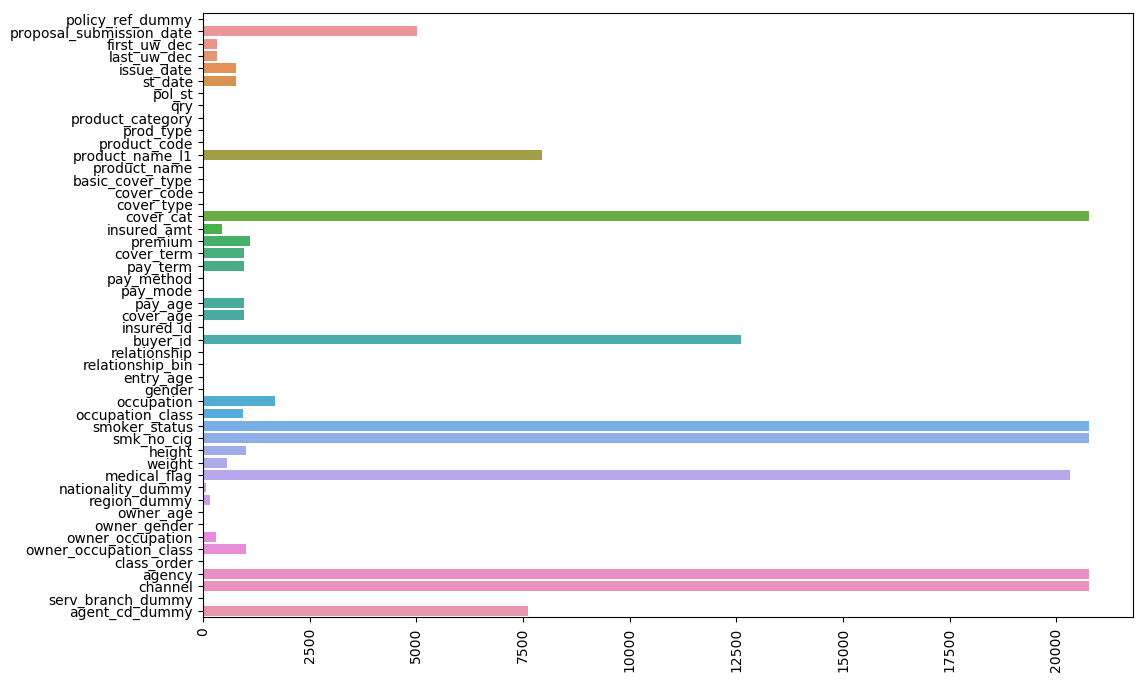

In [34]:
sns.barplot(x = df.isnull().sum().values , y = null_vals )
plt.xticks(rotation=90)

In [143]:
df.fillna(0,inplace=True)

In [71]:
df.columns

Index(['POLICY_REF_DUMMY', 'PROPOSAL_SUBMISSION_DATE', 'FIRST_UW_DEC',
       'LAST_UW_DEC', 'ISSUE_DATE', 'ST_DATE', 'POL_ST', 'QRY',
       'PRODUCT_CATEGORY', 'PROD_TYPE', 'PRODUCT_CODE', 'PRODUCT_NAME_L1',
       'PRODUCT_NAME', 'BASIC_COVER_TYPE', 'COVER_CODE', 'COVER_TYPE',
       'COVER_CAT', 'INSURED_AMT', 'PREMIUM', 'COVER_TERM', 'PAY_TERM',
       'PAY_METHOD', 'PAY_MODE', 'PAY_AGE', 'COVER_AGE', 'INSURED_ID',
       'BUYER_ID', 'RELATIONSHIP', 'RELATIONSHIP_BIN', 'ENTRY_AGE', 'GENDER',
       'OCCUPATION', 'OCCUPATION_CLASS', 'SMOKER_STATUS', 'SMK_NO_CIG',
       'HEIGHT', 'WEIGHT', 'MEDICAL_FLAG', 'NATIONALITY_DUMMY', 'REGION_DUMMY',
       'OWNER_AGE', 'OWNER_GENDER', 'OWNER_OCCUPATION',
       'OWNER_OCCUPATION_CLASS', 'CLASS_ORDER', 'AGENCY', 'CHANNEL',
       'SERV_BRANCH_DUMMY', 'AGENT_CD_DUMMY'],
      dtype='object')

# VISUALISATION OF PERCENTAGE IN CATEGORIES

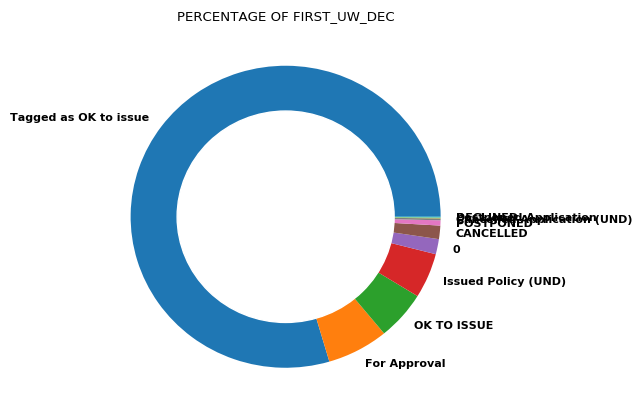

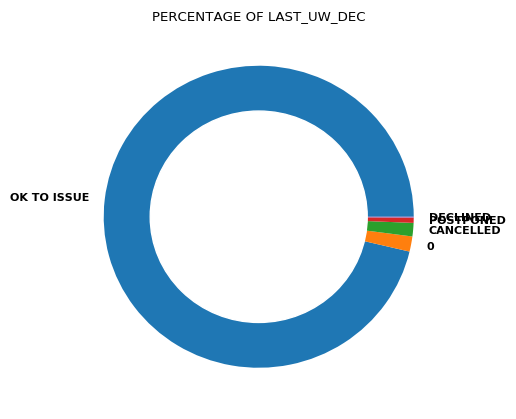

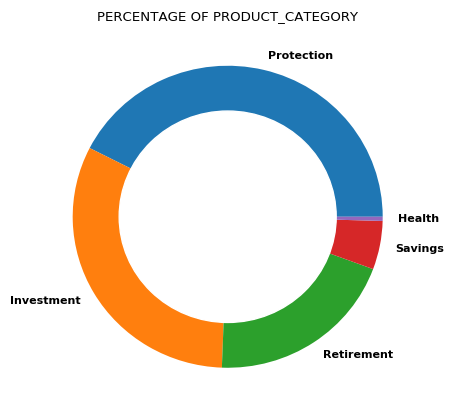

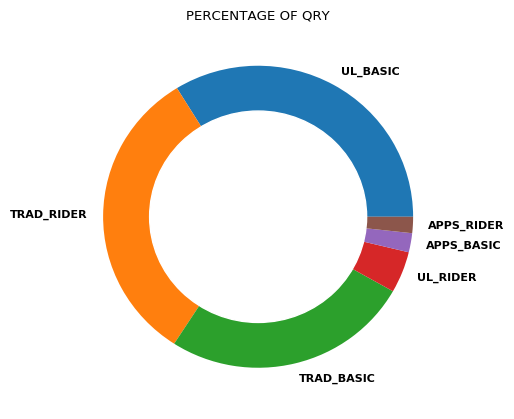

In [268]:
for i in ['FIRST_UW_DEC','LAST_UW_DEC','PRODUCT_CATEGORY','QRY']:
    plt.pie(df[i].value_counts().values, labels=df[i].value_counts().index)
    p=plt.gcf()
    central=plt.Circle( (0,0), 0.7, color='white')
    p.gca().add_artist(central)
    plt.title('PERCENTAGE OF '+ i)
    plt.show()

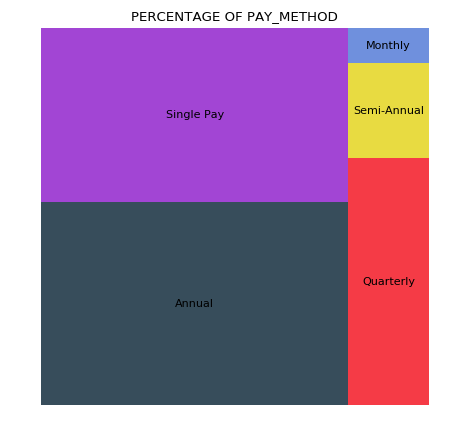

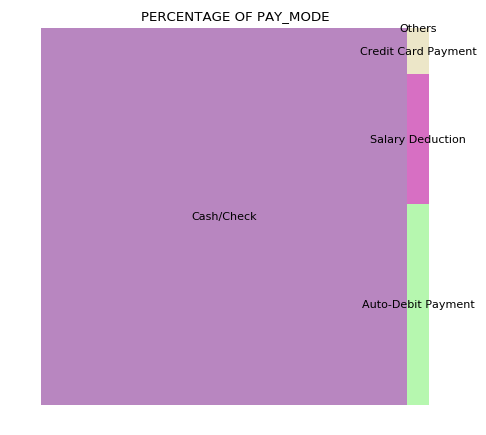

In [141]:
for i in ['PAY_METHOD','PAY_MODE']:
    squarify.plot(sizes=df[i].value_counts().values, label=df[i].value_counts().index, alpha=.8,  color=generate_random_color(len(df[i].unique())))
    plt.axis('off')
    plt.title('PERCENTAGE OF '+ i)
    plt.show()

# DISTRIBUTION

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


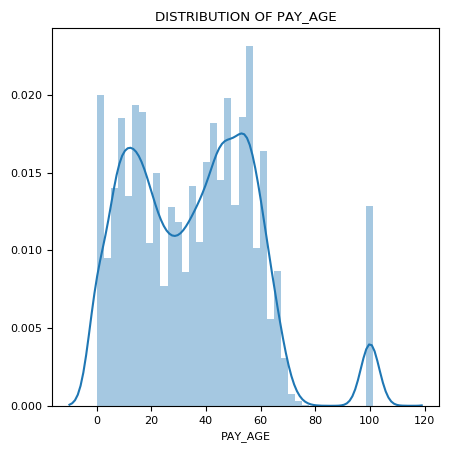

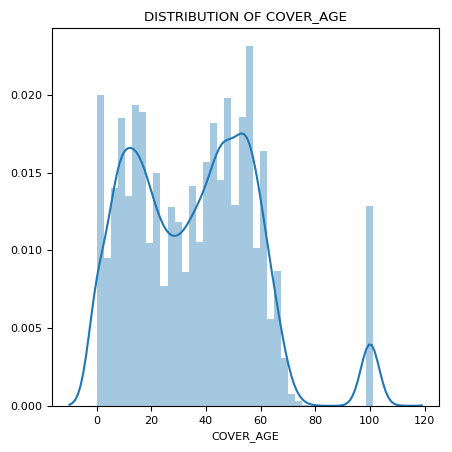

In [145]:
for i in ['PAY_AGE', 'COVER_AGE']:
    sns.distplot(df[i])
    plt.title('DISTRIBUTION OF '+ i)
    plt.show()

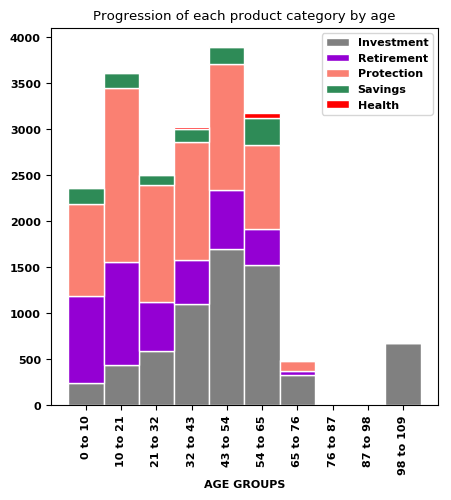

In [269]:
population,bins = np.histogram(df['COVER_AGE'].values, 10)
product_types = df['PRODUCT_CATEGORY'].unique()
stacked_plot = []
names = []
rc('font', weight='bold')

for i in range(len(bins)-1):
    df_filter= df[(df['COVER_AGE']>bins[i]) & (df['COVER_AGE']<=bins[i+1])]
    names.append(str(math.floor(bins[i]))+' to '+ str(math.floor(bins[i+1])))
    tmp = [len(df_filter[df_filter['PRODUCT_CATEGORY']==j]) for j in product_types]
    stacked_plot.append(tmp)
stacked_plot = np.array(stacked_plot).transpose()
pos = range(10)
color_range = ['grey','darkviolet','salmon','seagreen','red']
barWidth = 1
bottom_pos = np.zeros(10)

for i in range(5):
    plt.bar(pos, stacked_plot[i], color=color_range[i], bottom = bottom_pos, edgecolor='white', width=barWidth,label=\
           product_types[i])
    bottom_pos += stacked_plot[i]
plt.xticks(pos, names, fontweight='bold',rotation=90)
plt.xlabel("AGE GROUPS",fontweight='bold')
plt.legend()
plt.title('Progression of each product category by age')
plt.show()

In [197]:
data_by_age = {}
for i in ['M','F']:
    tmp = df[df['GENDER']==i]['COVER_AGE'].values
    data_by_age[i] = np.histogram(tmp, 10)[0]
y = list(range(0, 120, 20))

layout = go.Layout(yaxis=go.YAxis(title='Age'),
                   xaxis=go.XAxis(
                       range=[-2400, 2400],
                       tickvals=[-2400, -1200, -600, 0, 600, 1200, 2400],
                       ticktext=[2400, 1200, 600, 0, 600, 1200, 2400],
                       title='Cover Age by Gender'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=data_by_age['M'],
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=data_by_age['F']*-1,
               orientation='h',
               name='Women',
               hoverinfo= data_by_age['F'],
               marker=dict(color='lightcoral')
               )]

py.iplot(dict(data=data, layout=layout))

In [201]:
print(data_by_age['M'].sum())
print(data_by_age['F'].sum())

8920
11832


# DATA IMBALANCE

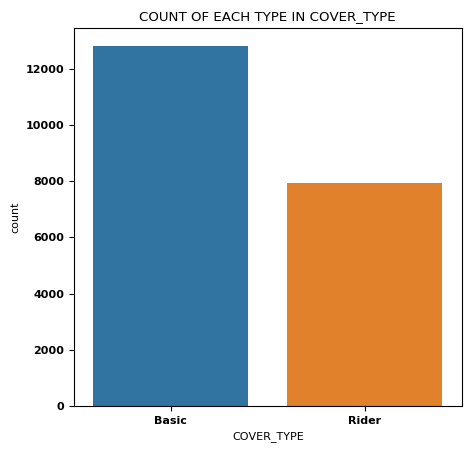

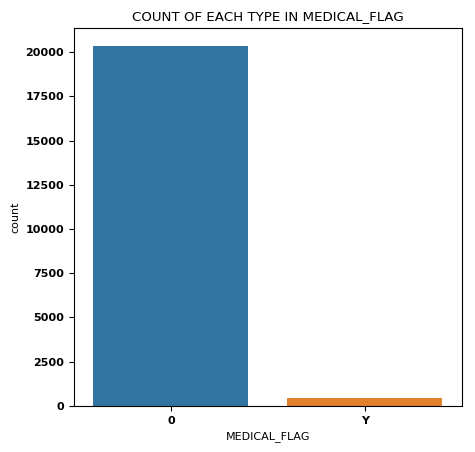

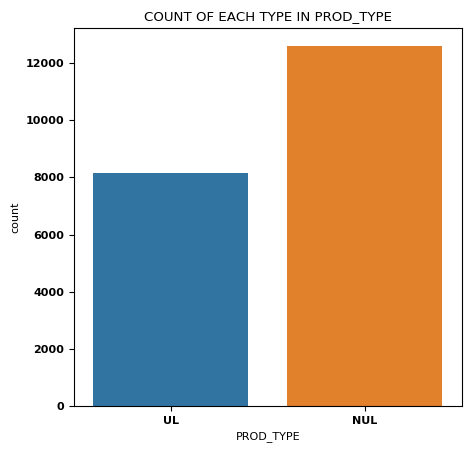

In [359]:
for i in ['COVER_TYPE','MEDICAL_FLAG','PROD_TYPE']:
    sns.countplot(df[i])
    plt.title('COUNT OF EACH TYPE IN '+ i)
    plt.show()

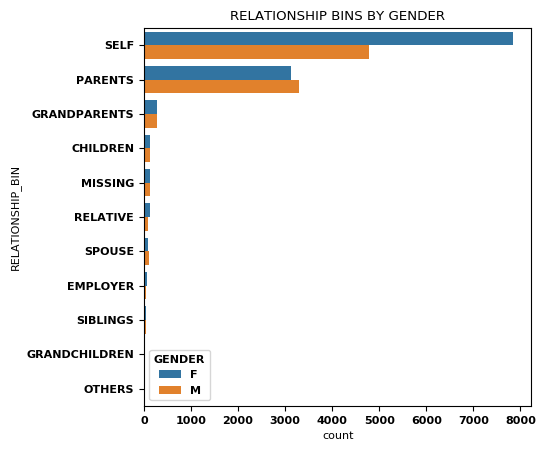

In [291]:
sns.countplot(y='RELATIONSHIP_BIN',hue="GENDER",order = df['RELATIONSHIP_BIN'].value_counts().index,data=df)
plt.title('RELATIONSHIP BINS BY GENDER')

In [345]:
df.columns

Index(['POLICY_REF_DUMMY', 'PROPOSAL_SUBMISSION_DATE', 'FIRST_UW_DEC',
       'LAST_UW_DEC', 'ISSUE_DATE', 'ST_DATE', 'POL_ST', 'QRY',
       'PRODUCT_CATEGORY', 'PROD_TYPE', 'PRODUCT_CODE', 'PRODUCT_NAME_L1',
       'PRODUCT_NAME', 'BASIC_COVER_TYPE', 'COVER_CODE', 'COVER_TYPE',
       'COVER_CAT', 'INSURED_AMT', 'PREMIUM', 'COVER_TERM', 'PAY_TERM',
       'PAY_METHOD', 'PAY_MODE', 'PAY_AGE', 'COVER_AGE', 'INSURED_ID',
       'BUYER_ID', 'RELATIONSHIP', 'RELATIONSHIP_BIN', 'ENTRY_AGE', 'GENDER',
       'OCCUPATION', 'OCCUPATION_CLASS', 'SMOKER_STATUS', 'SMK_NO_CIG',
       'HEIGHT', 'WEIGHT', 'MEDICAL_FLAG', 'NATIONALITY_DUMMY', 'REGION_DUMMY',
       'OWNER_AGE', 'OWNER_GENDER', 'OWNER_OCCUPATION',
       'OWNER_OCCUPATION_CLASS', 'CLASS_ORDER', 'AGENCY', 'CHANNEL',
       'SERV_BRANCH_DUMMY', 'AGENT_CD_DUMMY', 'HEIGHT_CM'],
      dtype='object')

In [349]:
for i in sorted(df['CLASS_ORDER'].unique()):
    print('======================')
    print('OCCUPATION IN CLASS '+ str(i) + " : " + str(len(df[df['CLASS_ORDER']==i]['OCCUPATION'].unique())))
    print('OCCUPATION IN CLASS '+ str(i) + " : " + str(df[df['CLASS_ORDER']==i]['OCCUPATION'].unique()) )
    print()

OCCUPATION IN CLASS 0 : 396
OCCUPATION IN CLASS 0 : ['PLANNER' 'HOUSEWIFE' 'RETIRED' 'PRIVATE TUTOR' 'PUBLIC SERVANT'
 'BANK EMPLOYEE' 'BUSINESSMAN' 'BUSINESSWOMAN' 'EXECUTIVE ASSISTANT'
 'MARKETING OFFICER' 'STUDENT' 'PENSIONER' 'PRACTICING ARCHITECT'
 'MANAGER' 'EMPLOYEE (CASHIER)' 'ACCOUNTING' 'INTERPRETER LANGUAGE'
 'TREASURER' 'OPERATIONS MANAGER' 'BANKING' 'BANK MANAGER'
 'BRAND MANAGER (UNITED LABORATORIES INC)' 'REAL ESTATE PROPERTY'
 'FINANCIAL ADVISOR' 'CHEF' 'EMPLOYEE' 'UNEMPLOYED' 'ARCHITECT'
 'PHYSICIAN' 'BUSINESSWOMAN/ PART OWNER OF BEACH RESOR' 'DENTIST'
 'HOUSWIFE' 'BANK CASHIER/ GREEN BANK, INC.' 'BRANCH MANAGER'
 'PROPRIETRESS' 0 'CEO' 'EXEC. ASSISTANT' 'NURSE IV, AREA MANAGER'
 'PRE SCHOOL TEACHER' 'BUSINESWOMAN' 'MECHANICAL ENGINEER'
 'ACCOUNTING SUPERVISOR' 'INVENTORY CONTROL ASSISTANCE'
 'INTERIOR DESIGNER' 'INVESTING' 'BUSINESSMAN/OWNER' 'NONE'
 'RETIRED EMPLOYEE' 'SELF EMPLOYED' 'BUSINESS WOMAN'
 'SR. ADMIN. COORDINATOR/CONTRACTS & GRANT' 'ENGINEER'
 'SALES ERVI

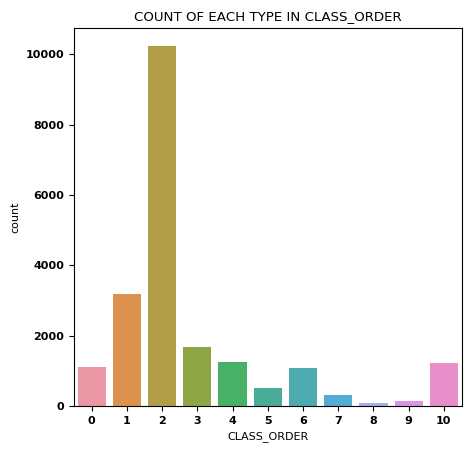

In [361]:
sns.countplot(df['CLASS_ORDER'])
plt.title('COUNT OF EACH TYPE IN CLASS_ORDER')
plt.show()

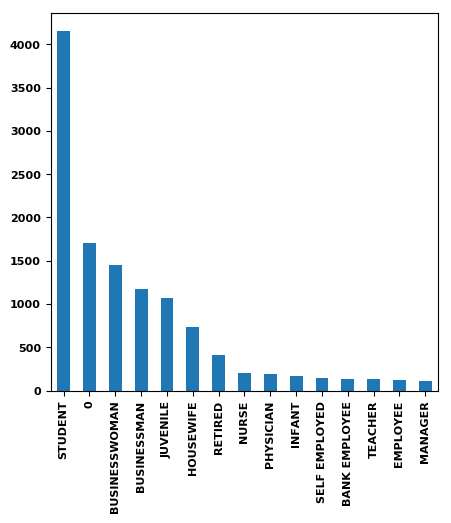

In [358]:
df['OCCUPATION'].value_counts()[:15].plot(kind="bar")

In [363]:
df.groupby('CLASS_ORDER').count()['OWNER_OCCUPATION_CLASS']

CLASS_ORDER
0      1095
1      3170
2     10229
3      1672
4      1245
5       516
6      1064
7       311
8        78
9       149
10     1223
Name: OWNER_OCCUPATION_CLASS, dtype: int64

In [379]:
df_buyers = df.groupby('INSURED_ID').count()[['BUYER_ID']].reset_index()
df_buyers.rename(columns={'BUYER_ID':'TOTAL_PAX'},inplace=True)

In [384]:
print('No of buyers who buy more than one',len(df_buyers[df_buyers['TOTAL_PAX']>1]))

No of buyers who buy more than one 4808


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



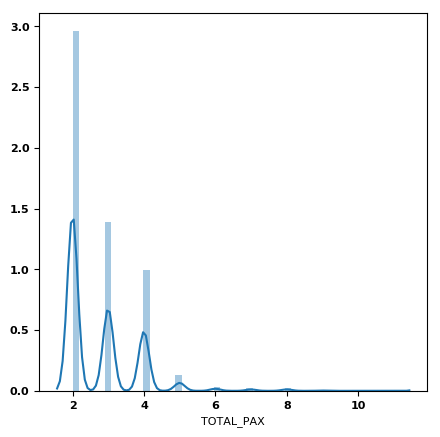

In [386]:
sns.distplot(df_buyers[df_buyers['TOTAL_PAX']>1]['TOTAL_PAX'])